# IC 720 Rotation Method

In [5]:
from TheOG.utils import *
import TheOG.rotate_tools as rot
import TheOG.isophote_tools as iso
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [6]:
datapath = 'ic720_data/ic720.fits'  # path to original data
nick = 'ic720'                      # nickname applied to file names and plots
file = 'ic720_output/ic720'         # saved and working location. Includes the nickname.
sci = 0                             # science index of data (usually 0)

Filename: ic720_data/ic720.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     357   (4220, 4300)   float32   
None
image is 2D.


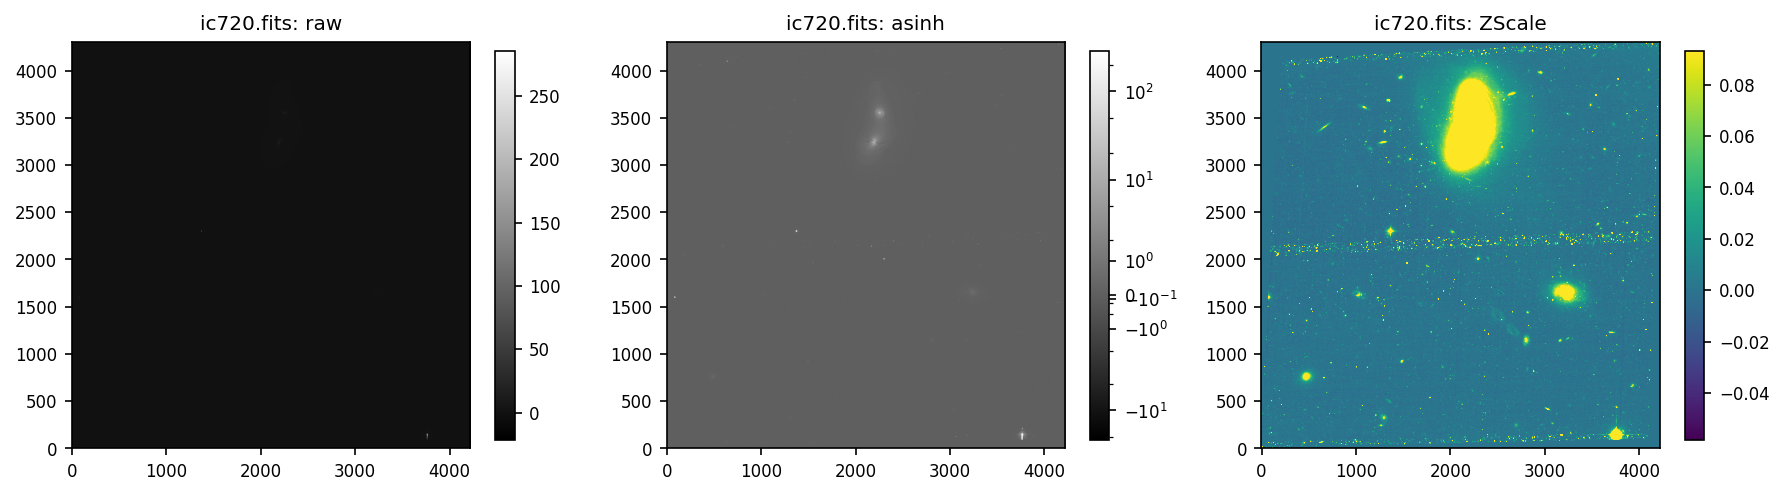

In [ ]:
# quickly opens and plots the raw data
hdulist0, image_data0, prihdr0 = quick_open(datapath, sci)

Filename: ic720_data/ic720.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     357   (4220, 4300)   float32   
None
image is 2D.
data shape: (1902, 2000)


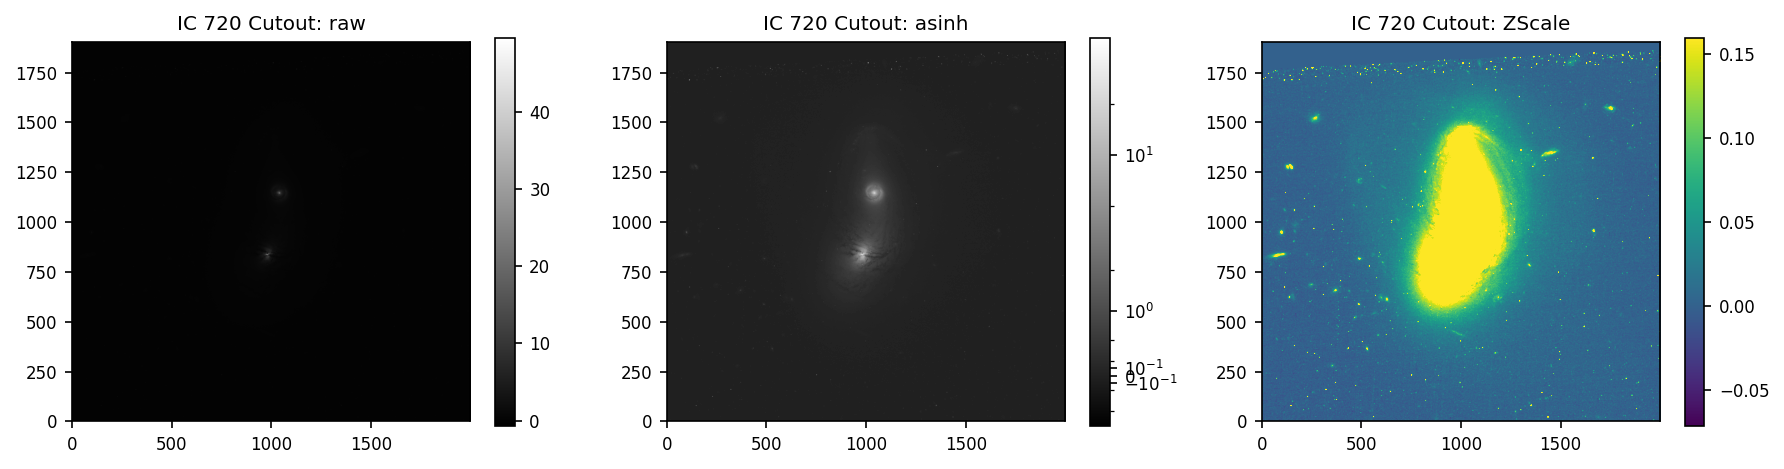

In [ ]:
# cutout position and size
pos,size = (2210,3398),(2000, 2000)

# creates a working file, and use a cutout if needed
hdulist, image_data, prihdr = create_working_file(path=datapath, sci=sci, file=file, cutout=True, pos=pos, size=size)

# quickly plots the cutout data
quick_plot(image_data, name='IC 720 Cutout')

## Apertures

In [ ]:
# creates regions in DS9
rot.drawregions(fitsfile=file+'.fits', science=sci)

data shape:	 (1902, 2000)

Please open DS9 with the newly generated .reg file and move
the x to the forground galaxy center, 
the + to the background galaxy center, 
the blue ellipse to encompass the foreground galaxy, and
the red ellipse to encompass the background galaxy.

WHEN SAVING, OPT FOR IMAGE so everything is in PIXELS for TheOG to deal with.
Best practice is to make a separate .reg file in WCS.


In [13]:
# reads the regions from DS9
x0_fg,y0_fg,a_fg,b_fg,pa_fg, x0_bg,y0_bg,a_bg,b_bg,pa_bg  = rot.readregion(file+'_regions.reg')

# Region file format: DS9 version 4.1

global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1

image

point(981.40924,835.05118) # point=x 15 color=red text={BG center}

Found the background galaxy center marker!
981.40924 835.05118
point(1038.2624,1144.9215) # point=cross 15 color=blue text={FG center}

Found the foreground galaxy center marker!
1038.2624 1144.9215
ellipse(1038.2621,1144.9129,463.08712,302.73788,89.999997) # color=blue

Found the foreground galaxy ellipse!
1038.2621 1144.9129 463.08712 302.73788 89.999997 

ellipse(981.41331,835.04407,280.54421,395.16782,338.81011) # color=red

Found the background galaxy ellipse!
981.41331 835.04407 280.54421 395.16782 338.81011 



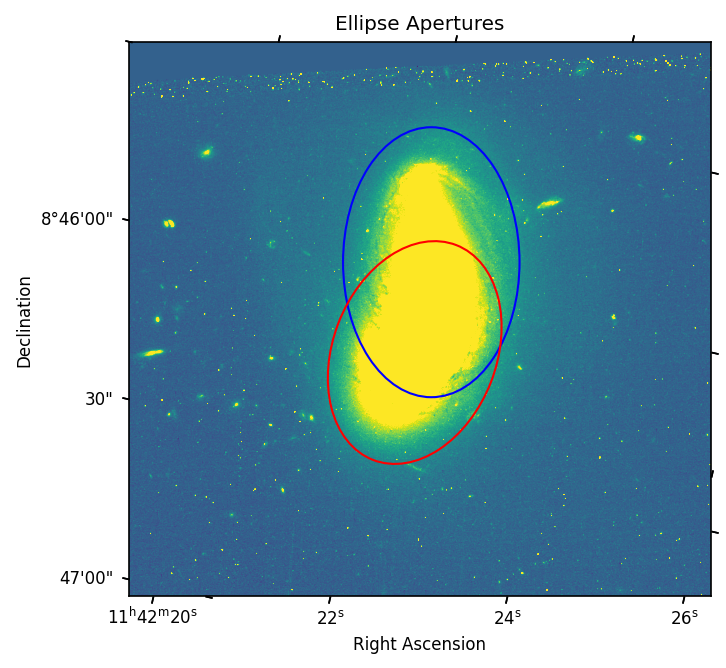

In [14]:
# defining apertures
aper_fg = (x0_fg,y0_fg,a_fg,b_fg,pa_fg)
aper_bg = (x0_bg,y0_bg,a_bg,b_bg,pa_bg)

rot.plot_ellipses(image_data, prihdr, aper_fg, aper_bg, figname=file+'_elip_aper.png', ZScale=True)

## Rotation Method


input position (x,y) in px:	 1038.2624, 1144.9215
input position (ra,dec) in deg:	 175.59288035144218, 8.765445470873772

original position:	 (1038, 1145)
original shape:		 (1902, 2000)
cutout shape:		 (6000, 6000)
cutout corners:		 x:(-1962, 4038), y:(-1855, 4145) 


input position (x,y) in px:	 981.40924, 835.05118
input position (ra,dec) in deg:	 175.593060295597, 8.769817447818275

original position:	 (981, 835)
original shape:		 (1902, 2000)
cutout shape:		 (6000, 6000)
cutout corners:		 x:(-2019, 3981), y:(-2165, 3835) 



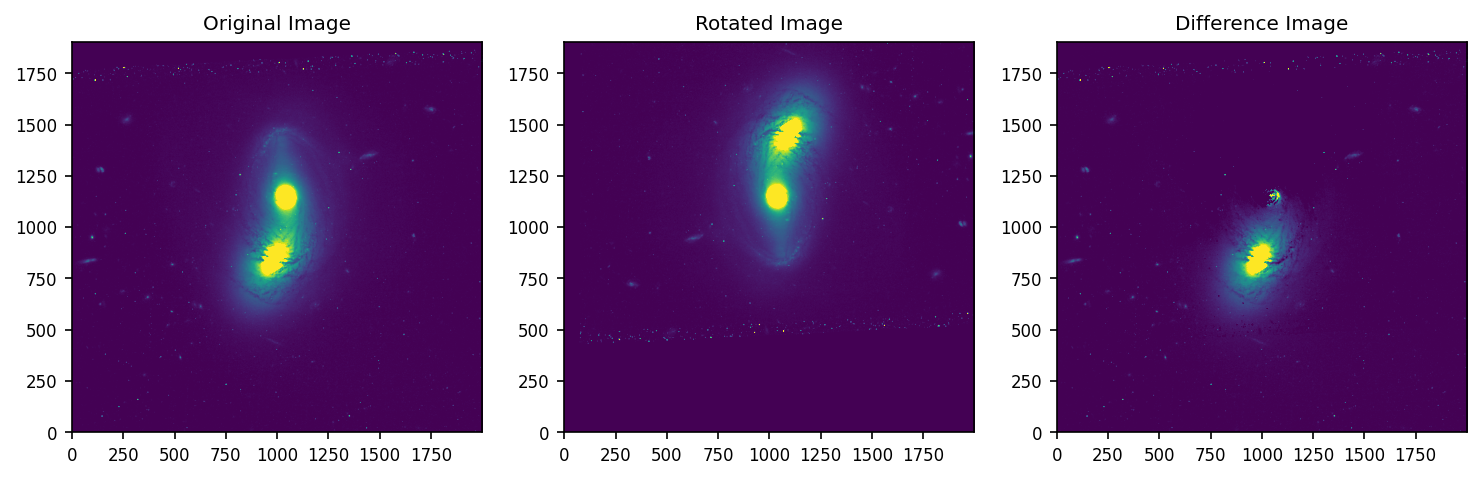

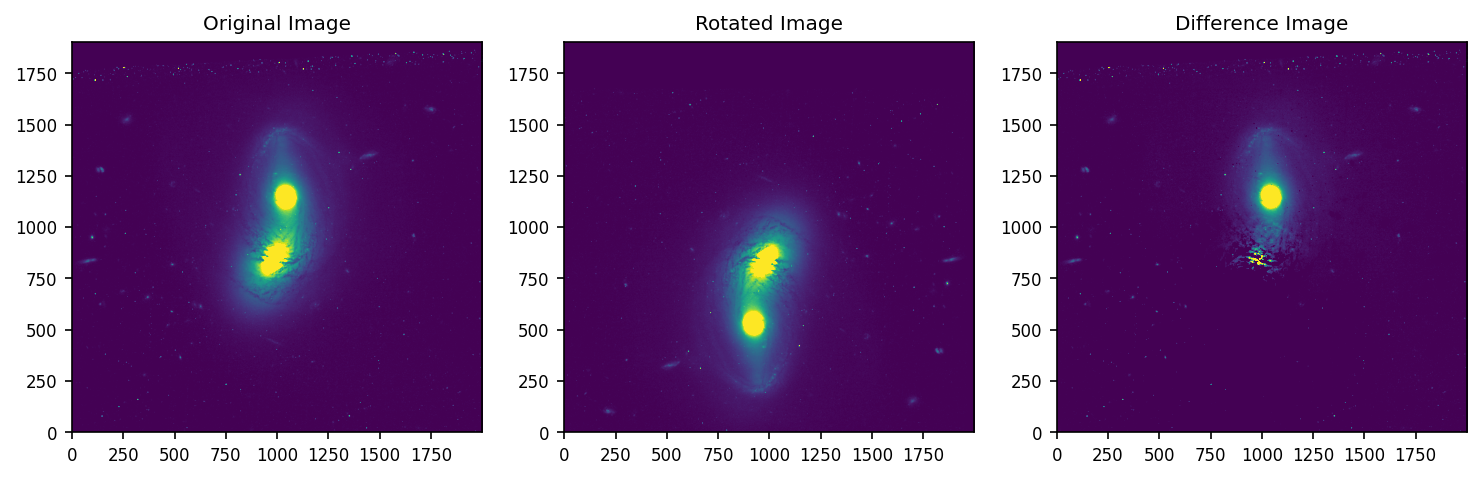

In [16]:
# Note: With JWST images, 'WARNING: FITSFixedWarning' shows up. This is suppressed in Image_tools.

# foreground
fg_rot_model = rot.imrotate(data=image_data,header=prihdr, x0=x0_fg, y0=y0_fg, dimen=u.Quantity((5, 5), u.arcmin), rotangle=180.,  
                           figname=file+'_foreground_rotated.png',ZScale=False)

# background
bg_rot_model = rot.imrotate(data=image_data,header=prihdr, x0=x0_bg, y0=y0_bg, dimen=u.Quantity((5, 5), u.arcmin), rotangle=180.,  
                           figname=file+'_background_rotated.png',ZScale=False)

pixrange = 14
pixelstep = 2
checking -14,-14
new best center: difference 37.248632937669754
checking -14,-12
new best center: difference 36.85835722461343
checking -14,-10
new best center: difference 36.06256239116192
checking -14,-8
new best center: difference 35.38908276334405
checking -14,-6
new best center: difference 34.704739179462194
checking -14,-4
new best center: difference 34.10904215276241
checking -14,-2
new best center: difference 33.50390516221523
checking -14,0
new best center: difference 33.272384863346815
checking -14,2
checking -14,4
checking -14,6
checking -14,8
checking -14,10
checking -14,12
checking -12,-14
checking -12,-12
checking -12,-10
checking -12,-8
checking -12,-6
checking -12,-4
checking -12,-2
new best center: difference 33.193113662302494
checking -12,0
new best center: difference 32.742274072021246
checking -12,2
checking -12,4
checking -12,6
checking -12,8
checking -12,10
checking -12,12
checking -10,-14
checking -10,-12
checking -10,-10
checking -10

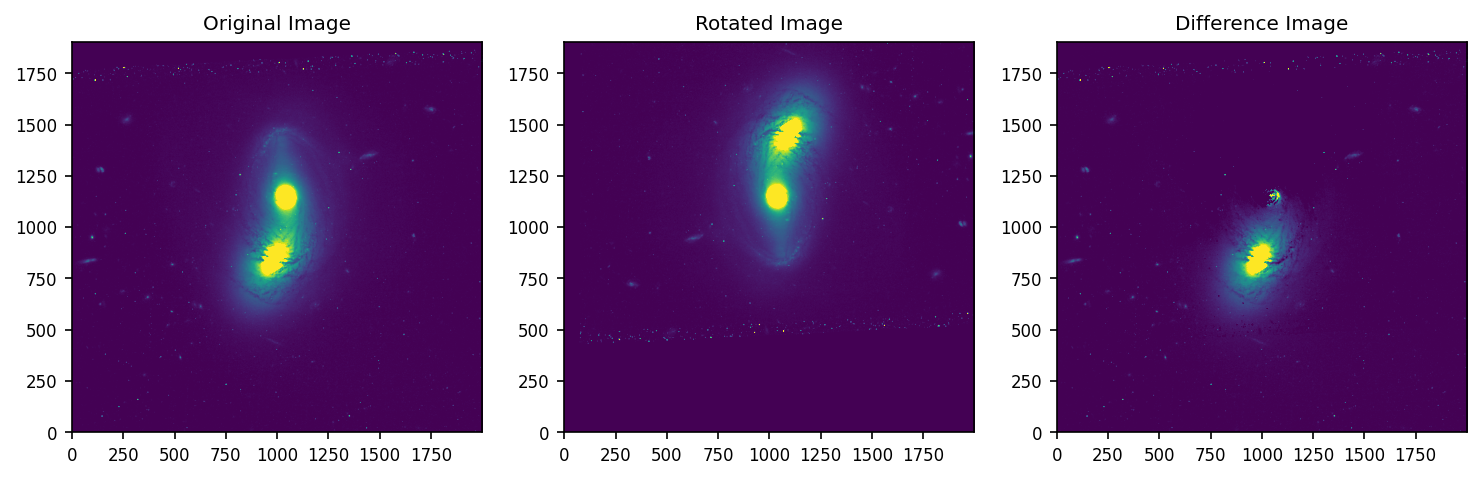

In [18]:
# foreground rough (no fine tuning)

fg_dx, fg_dy = rot.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_fg,y0=y0_fg,pixrange=20,pixelstep=4,figname=file+'_fg_jiggle.png', 
                                            regfile=file+'_center_regions.reg', foreground=True)
print(fg_dx,fg_dy)

pixrange = 2
pixelstep = 1
checking -2,-2
new best center: difference 20.11733627319336
checking -2,-1
new best center: difference 18.44308888167143
checking -2,0
new best center: difference 16.392833672463894
checking -2,1
new best center: difference 15.760131016373634
checking -1,-2
checking -1,-1
checking -1,0
new best center: difference 12.57154181599617
checking -1,1
new best center: difference 12.564711198210716
checking 0,-2
checking 0,-1
new best center: difference 12.373062893748283
checking 0,0
new best center: difference 7.080802991986275
checking 0,1
checking 1,-2
checking 1,-1
checking 1,0
new best center: difference 4.2490218579769135
checking 1,1

input position (x,y) in px:	 1039.2624, 1144.9215
input position (ra,dec) in deg:	 175.5928940592452, 8.765442411303017

original position:	 (1039, 1145)
original shape:		 (1902, 2000)
cutout shape:		 (2400, 2400)
cutout corners:		 x:(-161, 2239), y:(-55, 2345) 

1 0


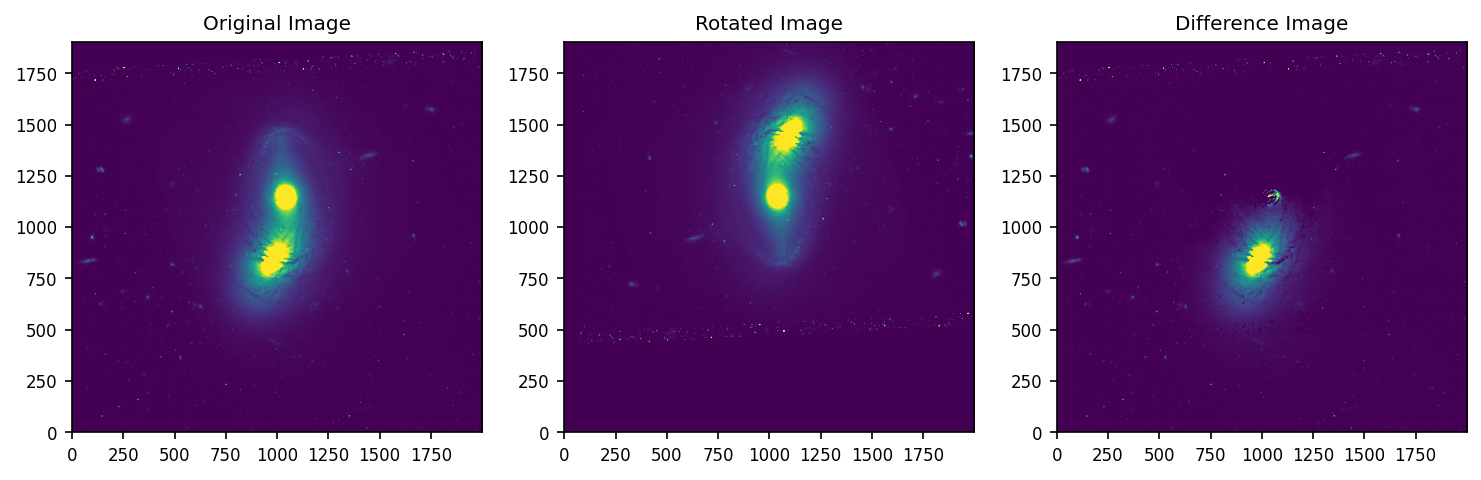

In [22]:
# foreground, now using finetune to check around the new best point

fg_dx, fg_dy = rot.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_fg+fg_dx,y0=y0_fg+fg_dy,pixrange=20,pixelstep=4,figname=file+'_fg_jiggle.png', 
                                            regfile=file+'_center_regions.reg', foreground=True, finetune=True)
print(fg_dx,fg_dy)

pixrange = 41
pixelstep = 8
checking -41,-41
new best center: difference 150.3233847860247
checking -41,-33
new best center: difference 147.60270238667727
checking -41,-25
new best center: difference 145.0436052940786
checking -41,-17
new best center: difference 143.68913255631924
checking -41,-9
checking -41,-1
checking -41,7
checking -41,15
checking -41,23
checking -41,31
checking -41,39
checking -33,-41
checking -33,-33
new best center: difference 141.81275257468224
checking -33,-25
new best center: difference 137.52761355228722
checking -33,-17
new best center: difference 135.2105369195342
checking -33,-9
checking -33,-1
checking -33,7
checking -33,15
checking -33,23
checking -33,31
checking -33,39
checking -25,-41
checking -25,-33
new best center: difference 134.17920424602926
checking -25,-25
new best center: difference 126.19937878660858
checking -25,-17
new best center: difference 120.5716765485704
checking -25,-9
checking -25,-1
checking -25,7
checking -25,15
checking -25,23
c

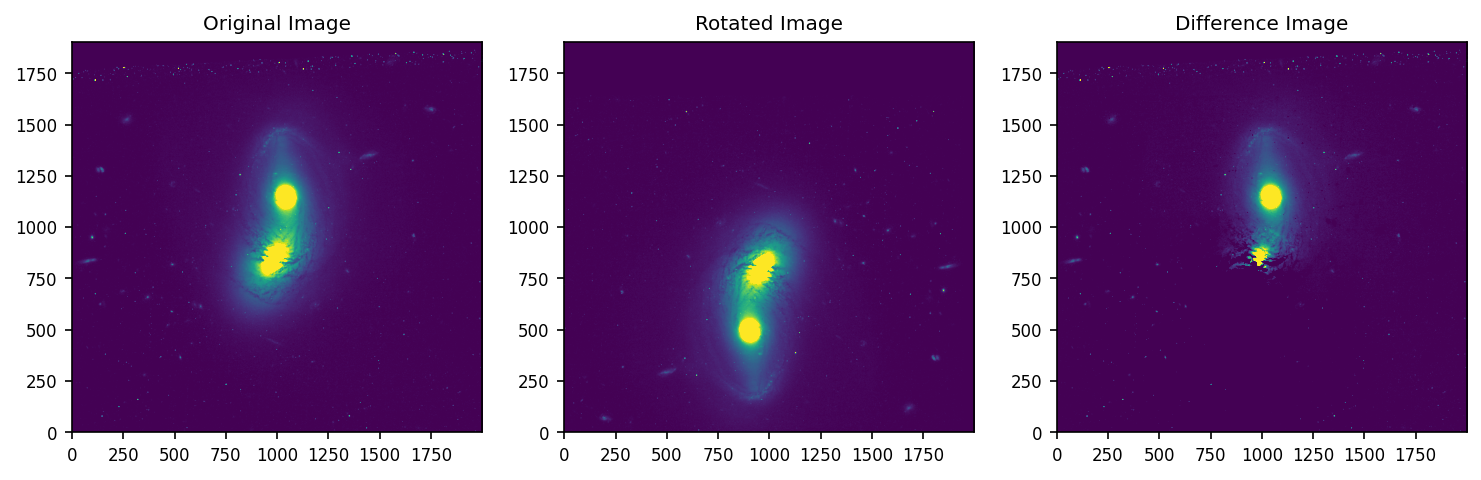

In [23]:
# background rough (no fine tuning)

bg_dx, bg_dy = rot.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_bg,y0=y0_bg,pixrange=10,pixelstep=1,figname=file+'_bg_jiggle.png',
                                    regfile=file+'_center_regions.reg', foreground=False)
print(bg_dx,bg_dy)

pixrange = 2
pixelstep = 1
checking -2,-2
new best center: difference 42.92577193584293
checking -2,-1
new best center: difference 42.913318663369864
checking -2,0
new best center: difference 42.890419708099216
checking -2,1
new best center: difference 42.87636730540544
checking -1,-2
checking -1,-1
checking -1,0
checking -1,1
checking 0,-2
checking 0,-1
checking 0,0
checking 0,1
checking 1,-2
checking 1,-1
checking 1,0
checking 1,1

input position (x,y) in px:	 970.40924, 819.05118
input position (ra,dec) in deg:	 175.59295904025572, 8.770067866365327

original position:	 (970, 819)
original shape:		 (1902, 2000)
cutout shape:		 (2400, 2400)
cutout corners:		 x:(-230, 2170), y:(-381, 2019) 

-2 1


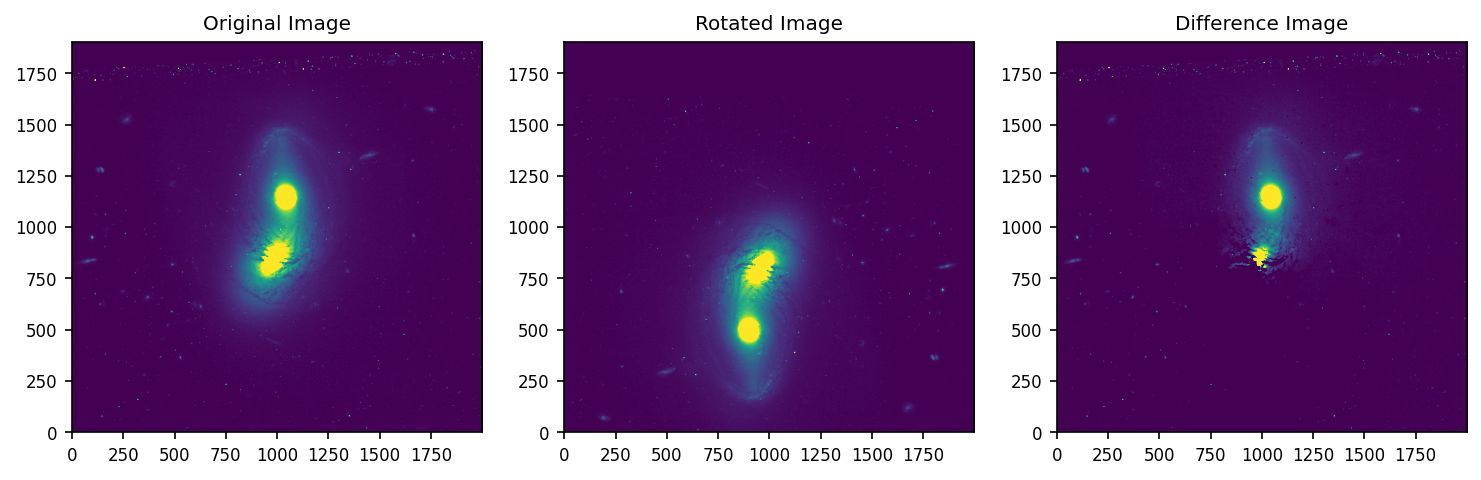

In [24]:
# background, now using finetune to check around the new best point

bg_dx, bg_dy = rot.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_bg+bg_dx,y0=y0_bg+bg_dy,pixrange=20,pixelstep=4,figname=file+'_bg_jiggle.png', 
                                            regfile=file+'_center_regions.reg', foreground=True, finetune=True)
print(bg_dx,bg_dy)

In [ ]:
x0_fg_jiggle = x0_fg + fg_dx
y0_fg_jiggle = y0_fg + fg_dy

x0_bg_jiggle = x0_bg + bg_dx
y0_bg_jiggle = y0_bg + bg_dy

# If jiggle_and_rotate gave desirable results, add the change here:
aper_fg = (x0_fg_jiggle,y0_fg_jiggle,a_fg,b_fg,pa_fg)      # in this example, the foreground center has been improved
aper_bg = (x0_bg,y0_bg,a_bg,b_bg,pa_bg)                    # but the background has not been improved

c:\Users\dogfi\Documents\Research\OAKS\Python\OverlappingGalaxies\TheOG\rotate_tools.py:575: RuntimeWarning: overflow encountered in divide
  trans = (data-fg)/bg


Aperture Growth Factor:	 2.0
Foreground	 major axis:	 463.08712	 minor axis:	302.73788
Background	 major axis:	 280.54421	 minor axis:	395.16782


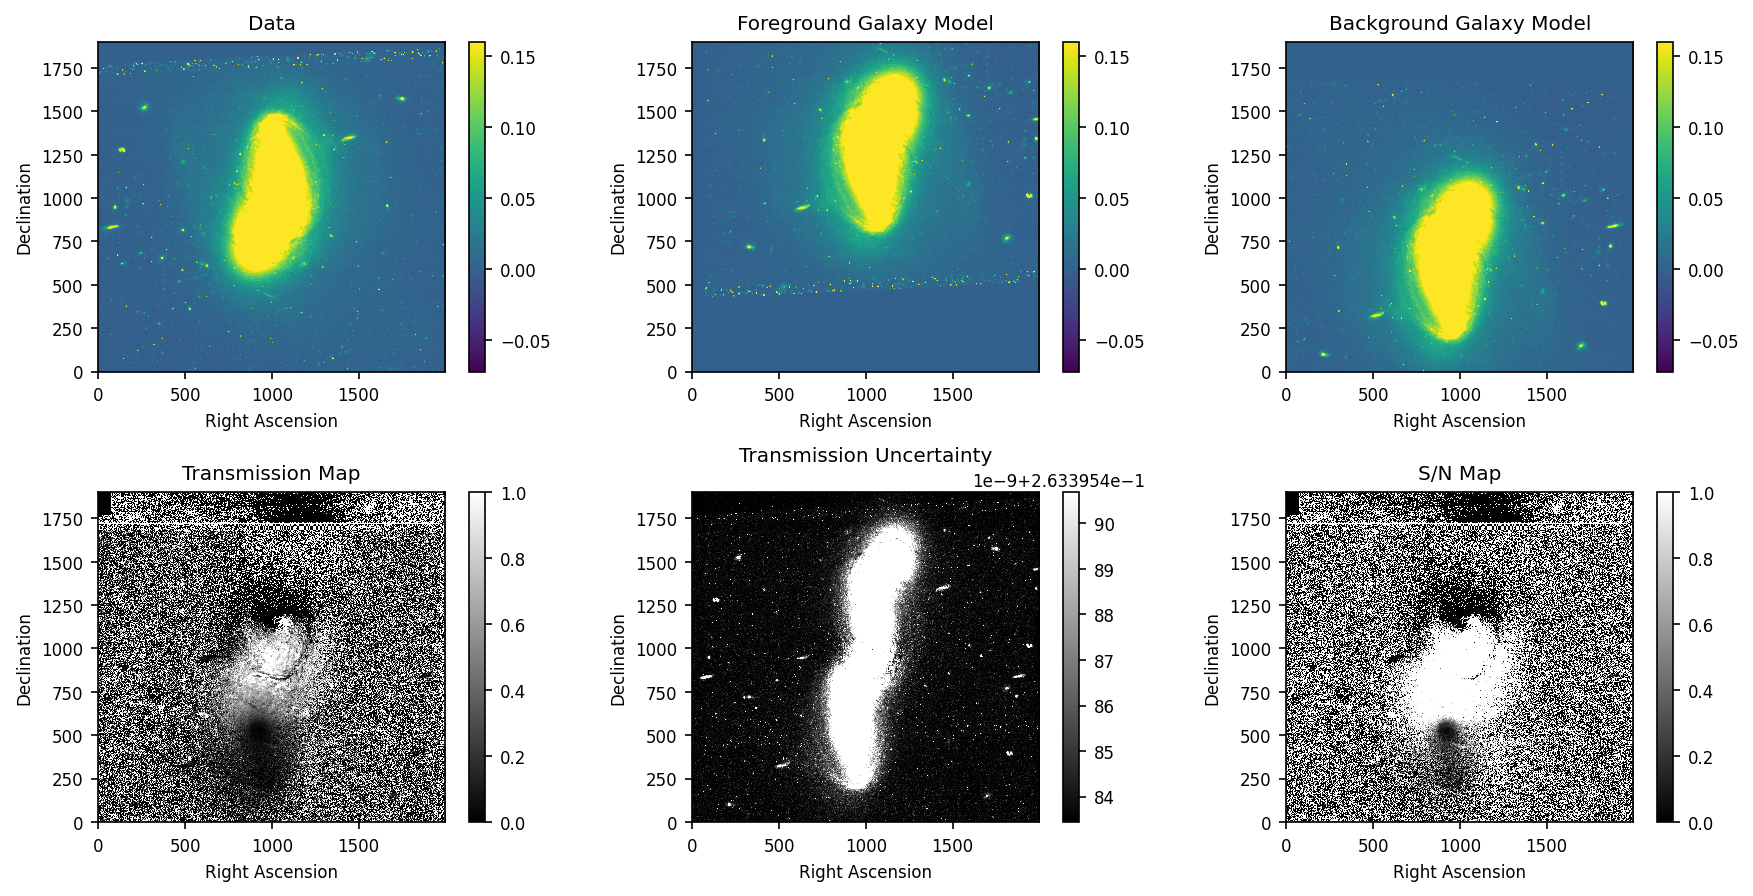

In [28]:
trans,sn_trans,DTmap = rot.transmission(image_data, prihdr, fg_rot_model.data, bg_rot_model.data, aper_fg, aper_bg,figname=file+'_transmission',
                                       ZScale=True, celestial=False, norm='linear')

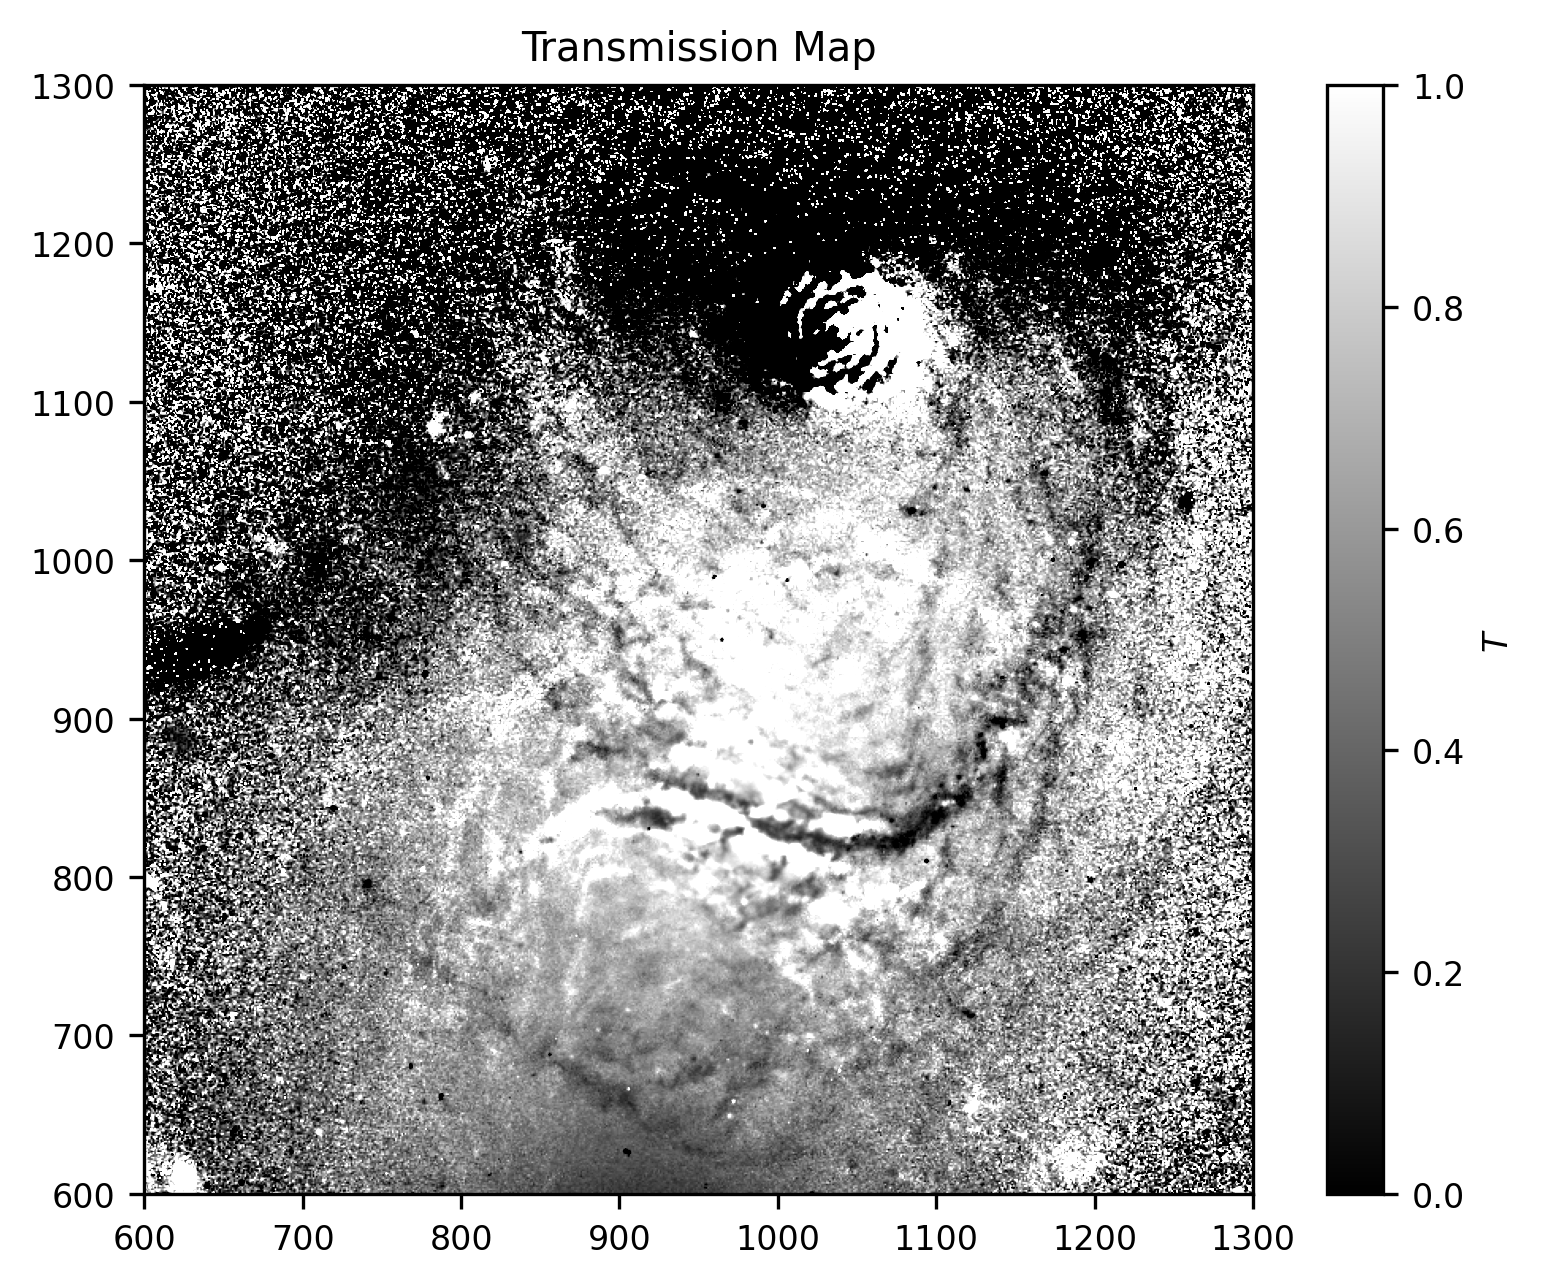

In [34]:
plt.figure(dpi=300)
plt.imshow(trans, origin='lower',vmin=0,vmax=1, cmap='gray')
plt.title('Transmission Map')
plt.xlim(600,1300)
plt.ylim(600,1300)
plt.colorbar(label='$T$')
plt.savefig(file+'_transmission_single.png')